In [1]:
import pandas as pd
from statsmodels import api as sm

In [2]:
auto_data = pd.read_csv('Auto.csv', index_col='name')
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


Notice: no horsepower

In [3]:
auto_data.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Need to remove '?' from horsepower and convert column datatype to int

In [4]:
auto_data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [5]:
auto_data_clean = auto_data[auto_data.horsepower != '?'].copy()
auto_data_clean['horsepower'] = auto_data_clean['horsepower'].astype('int')
auto_data_clean.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
X = sm.add_constant(auto_data_clean['horsepower'])
X.head()

,const,horsepower
name,,
chevrolet chevelle malibu,1.0,130
buick skylark 320,1.0,165
plymouth satellite,1.0,150
amc rebel sst,1.0,150
ford torino,1.0,140


In [7]:
linear_model = sm.OLS(auto_data_clean['mpg'], X).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 24 May 2024   Prob (F-statistic):           7.03e-81
Time:                        13:05:13   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

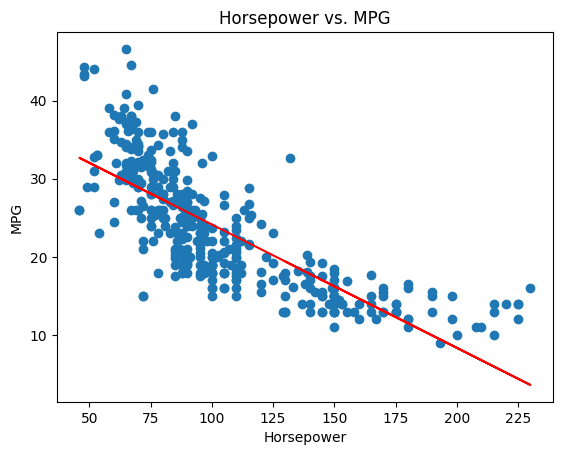

In [8]:
import matplotlib.pyplot as plt

plt.scatter(auto_data_clean['horsepower'], auto_data_clean['mpg'])
plt.plot(auto_data_clean['horsepower'], linear_model.predict(X), color='red')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Horsepower vs. MPG')
plt.show()

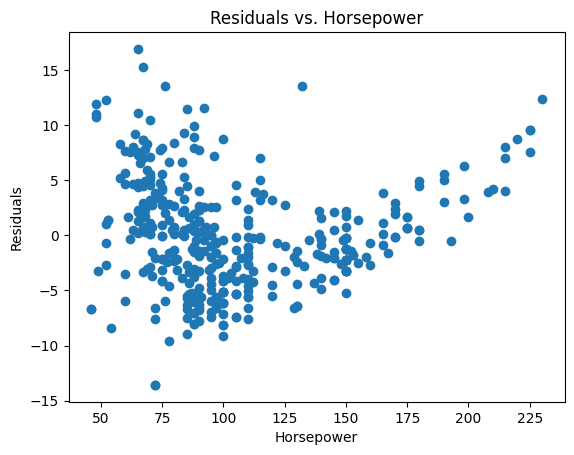

In [9]:
labels = auto_data_clean['mpg'].copy()
# find model residuals
residuals = labels - linear_model.predict(X)
plt.scatter(auto_data_clean['horsepower'], residuals)
plt.xlabel('Horsepower')
plt.ylabel('Residuals')
plt.title('Residuals vs. Horsepower')
plt.show()

In [10]:
# drop 10th through 85th observations
df_subset=auto_data_clean.iloc[9:85]
df_subset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,1
dodge challenger se,15.0,8,383.0,170,3563,10.0,70,1
plymouth 'cuda 340,14.0,8,340.0,160,3609,8.0,70,1
chevrolet monte carlo,15.0,8,400.0,150,3761,9.5,70,1
buick estate wagon (sw),14.0,8,455.0,225,3086,10.0,70,1


In [11]:
df_new = auto_data_clean.merge(df_subset, how='left', indicator=True)
df_new = df_new[df_new['_merge'] == 'left_only']
df_new.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,_merge
0,18.0,8,307.0,130,3504,12.0,70,1,left_only
1,15.0,8,350.0,165,3693,11.5,70,1,left_only
2,18.0,8,318.0,150,3436,11.0,70,1,left_only
3,16.0,8,304.0,150,3433,12.0,70,1,left_only
4,17.0,8,302.0,140,3449,10.5,70,1,left_only


In [12]:
df_new.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,24.404430,5.373418,187.240506,100.721519,2935.971519,15.726899,77.145570,1.601266
std,7.867283,1.654179,99.678367,35.708853,811.300208,2.693721,3.106217,0.819910
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,100.250000,75.000000,2213.750000,14.000000,75.000000,1.000000
50%,23.950000,4.000000,145.500000,90.000000,2792.500000,15.500000,77.000000,1.000000
75%,30.550000,6.000000,250.000000,115.000000,3508.000000,17.300000,80.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000


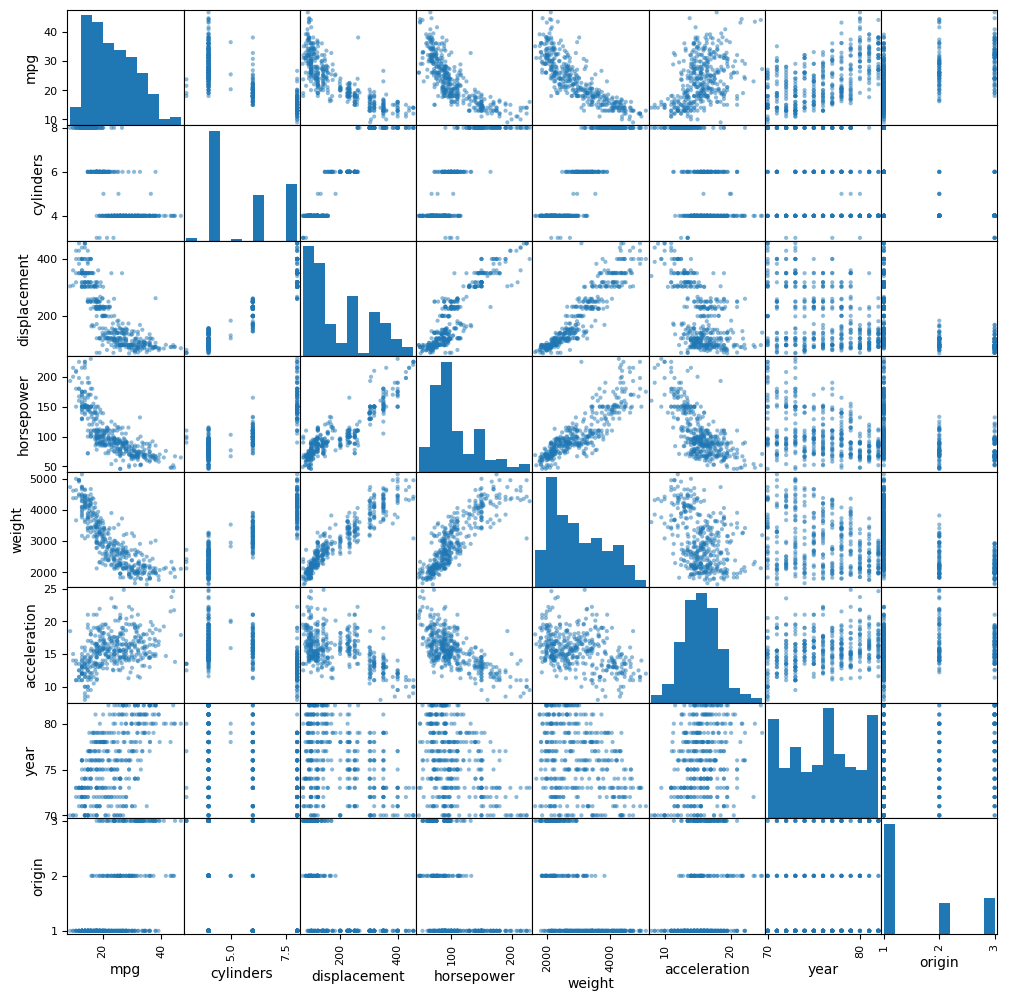

In [13]:
pd.plotting.scatter_matrix(auto_data_clean, figsize=(12, 12))
print() # suppress output

In [14]:
auto_data_clean.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [15]:
features = auto_data_clean.drop('mpg', axis=1)
features.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,
chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,1
buick skylark 320,8,350.0,165,3693,11.5,70,1
plymouth satellite,8,318.0,150,3436,11.0,70,1
amc rebel sst,8,304.0,150,3433,12.0,70,1
ford torino,8,302.0,140,3449,10.5,70,1


In [16]:
from statsmodels.formula.api import ols

eqn = 'mpg ~ weight + horsepower + displacement + cylinders + acceleration + year + origin'
mult_linear_model = ols(eqn, data=auto_data_clean).fit()
mult_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 24 May 2024   Prob (F-statistic):          2.04e-139
Time:                        13:05:15   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
anova_table = sm.stats.anova_lm(mult_linear_model)
print(anova_table)

                 df        sum_sq       mean_sq            F         PR(>F)
weight          1.0  16497.759763  16497.759763  1489.845511  3.059900e-134
horsepower      1.0    327.388269    327.388269    29.565102   9.638024e-08
displacement    1.0     13.819676     13.819676     1.247999   2.646335e-01
cylinders       1.0     16.592418     16.592418     1.498394   2.216692e-01
acceleration    1.0      0.966071      0.966071     0.087242   7.678728e-01
year            1.0   2419.120249   2419.120249   218.460900   1.875281e-39
origin          1.0    291.134494    291.134494    26.291171   4.665681e-07
Residual      384.0   4252.212530     11.073470          NaN            NaN


More support for non-linearity in the data

C:\Users\rgbmr\AppData\Local\Temp\ipykernel_13744\3168508626.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_preds = preds[sorted_indices]


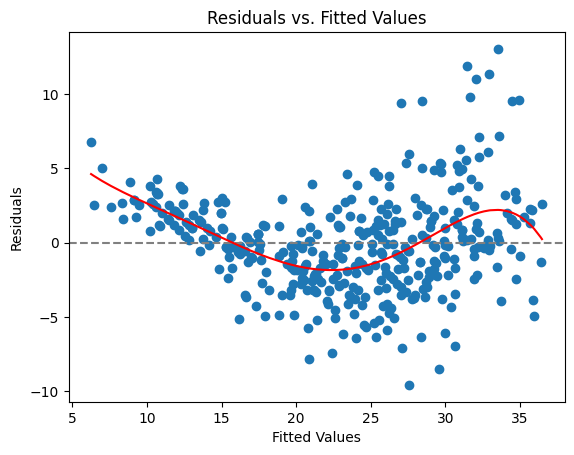

In [18]:
import numpy as np

def plot_residuals(model, features, labels, x_name='Values', degree=5):
    preds = model.predict(features)
    residuals = labels - preds
    plt.scatter(preds, residuals)

    # add a horizontal line at y=0 and a trend line
    plt.axhline(y=0, color='grey', linestyle='--')

    #calculate equation for trendline
    z = np.polyfit(preds, residuals, degree)
    p = np.poly1d(z)

    # Sort the fitted values for a smooth trendline
    sorted_indices = np.argsort(preds)
    sorted_preds = preds[sorted_indices]
    sorted_p_values = p(sorted_preds)

    #add trendline to plot
    plt.plot(sorted_preds, sorted_p_values, color='red')
    plt.xlabel(f'{x_name}')
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs. {x_name}')
    plt.show()

plot_residuals(mult_linear_model, features, labels, x_name='Fitted Values')

There appears to be four outliers w.r.t. the response values

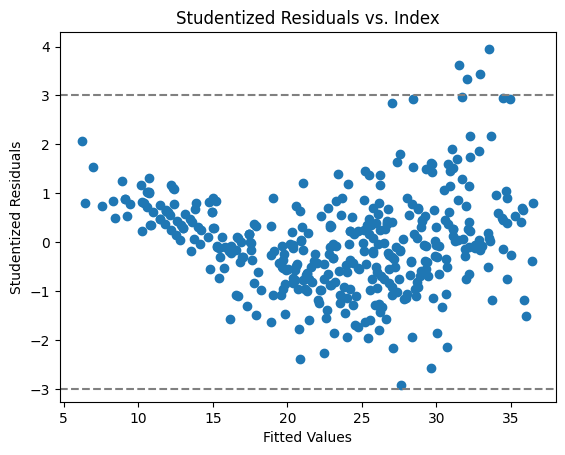

In [19]:
# get studentized residuals
studentized_residuals = mult_linear_model.get_influence().resid_studentized_internal
preds = mult_linear_model.predict(features)
# show outliers where studentized residuals are greater than 3
plt.scatter(preds, studentized_residuals)
plt.axhline(y=3, color='grey', linestyle='--')
plt.axhline(y=-3, color='grey', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Studentized Residuals')
plt.title('Studentized Residuals vs. Index')
plt.show()

In [20]:
outliers = auto_data_clean[studentized_residuals > 3]
outliers

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
volkswagen rabbit custom diesel,43.1,4,90.0,48,1985,21.5,78,2
mazda glc,46.6,4,86.0,65,2110,17.9,80,3
vw rabbit c (diesel),44.3,4,90.0,48,2085,21.7,80,2
vw dasher (diesel),43.4,4,90.0,48,2335,23.7,80,2


We saw from the scattermatrix earlier that displacement, horsepower, and weight all appeared to have a non-linear relationship with mpg. We already had an idea that horsepower had curvature.

C:\Users\rgbmr\AppData\Local\Temp\ipykernel_13744\3168508626.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_preds = preds[sorted_indices]


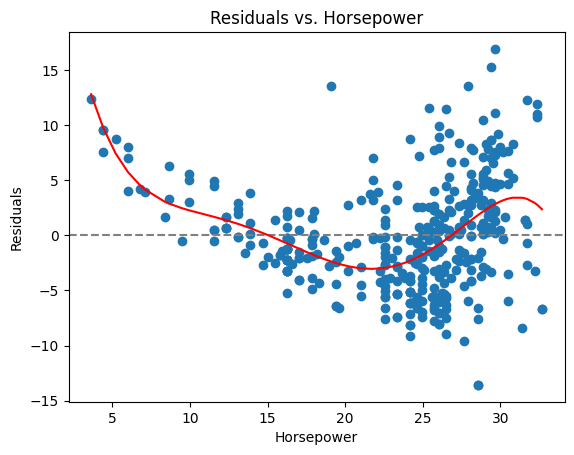

In [21]:
plot_residuals(linear_model, X, labels, x_name='Horsepower')

Now to check displacement and weight

Less curvature in the residual plot for displacement

C:\Users\rgbmr\AppData\Local\Temp\ipykernel_13744\3168508626.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_preds = preds[sorted_indices]


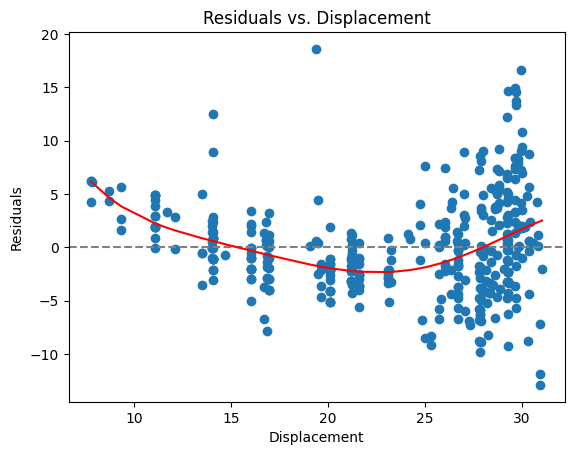

In [22]:
X = sm.add_constant(auto_data_clean['displacement'])
linear_model = sm.OLS(auto_data_clean['mpg'], X).fit()
plot_residuals(linear_model, X, labels, x_name='Displacement')

Even more so for the weight plot

C:\Users\rgbmr\AppData\Local\Temp\ipykernel_13744\3168508626.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_preds = preds[sorted_indices]


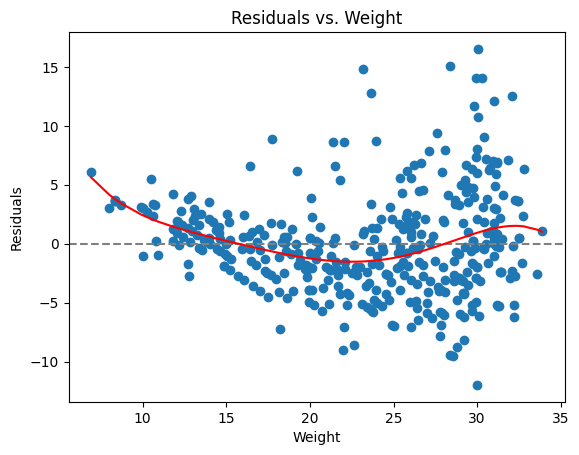

In [23]:
X = sm.add_constant(auto_data_clean['weight'])
linear_model = sm.OLS(auto_data_clean['mpg'], X).fit()
plot_residuals(linear_model, X, labels, x_name='Weight')

Correcting for the non-linearity of horsepower seems to be the most important focus as it displays the most curvature in the residual plot

In [24]:
eqn = 'mpg ~ horsepower'
base_model = ols(eqn, data=auto_data_clean).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 24 May 2024   Prob (F-statistic):           7.03e-81
Time:                        13:05:16   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Substantial R^2 improvement, quadratic term appears statistically significant

In [25]:
quad_eqn = 'mpg ~ horsepower + I(horsepower**2)'
quad_model = ols(quad_eqn, data=auto_data_clean).fit()
quad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Fri, 24 May 2024   Prob (F-statistic):           5.40e-99
Time:                        13:05:16   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             56.9001      1.800     31.604      0.000      53.360      60.440
horsepower            -0.4662      0.031    -14.978      0.000      -0.527      -0.405
I(horsepower ** 2)     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Residual plot supports these conclusions

C:\Users\rgbmr\AppData\Local\Temp\ipykernel_13744\3168508626.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_preds = preds[sorted_indices]


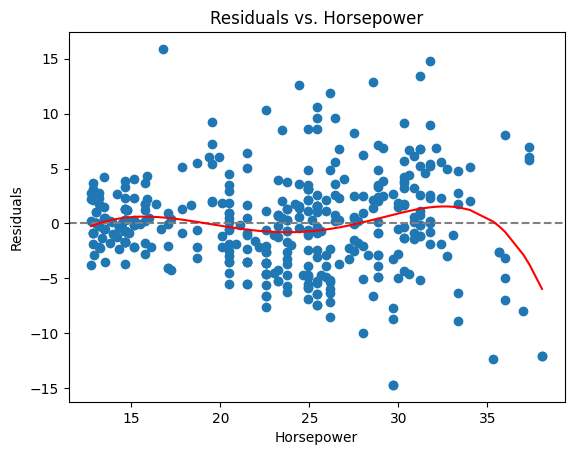

In [26]:
plot_residuals(quad_model, features, labels, x_name='Horsepower')

Attempt at mixed selection

In [27]:
features.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [28]:
candidates = set(features.columns.values)
candidates

{'acceleration',
 'cylinders',
 'displacement',
 'horsepower',
 'origin',
 'weight',
 'year'}

In [29]:
def mixed_selection(data):
    included = []
    features = data.drop('mpg', axis=1)
    candidates = set(features.columns.values)
    best_model = ols('mpg ~ 1', data=data).fit()
    best_aic = best_model.aic
    
    while True:
        changed = False
        best_candidate = None
        # Forward step: try adding each candidate
        for candidate in candidates:
            formula = f'mpg ~ {" + ".join(included + [candidate])}'
            model = ols(formula, data=data).fit()
            aic = model.aic
            if aic < best_aic:
                best_aic = aic
                best_model = model
                best_candidate = candidate
                changed = True

        if not changed:
            break

        included.append(best_candidate)
        candidates.remove(best_candidate)

    return best_model

Interestingly, the R-squared and AIC are both slightly worse than the full model (0.817 to 0.821 R-squared and 2064 to 2063 AIC)

In [30]:
best_model = mixed_selection(auto_data_clean)
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 24 May 2024   Prob (F-statistic):          7.26e-143
Time:                        13:05:16   Log-Likelihood:                -1027.8
No. Observations:                 392   AIC:                             2064.
Df Residuals:                     388   BIC:                             2080.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.0459      4.001     -4.510      0.000     -25.913     -10.179
weight        -0.0060      0.000    -23.588      0.000      -0.006      -0.005
year           0.7571      0.048     15.668      0.000       0.662       0.852
origin         1.1504      0.259      4.439      0.000       0.641       1.660
==============================================================================
Omnibus:                       39.172   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.003
Skew:                           0.577   Prob(JB):                     3.13e-17
Kurtosis:                       4.823   Cond. No.                     7.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\rgbmr\AppData\Local\Temp\ipykernel_13744\3168508626.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_preds = preds[sorted_indices]


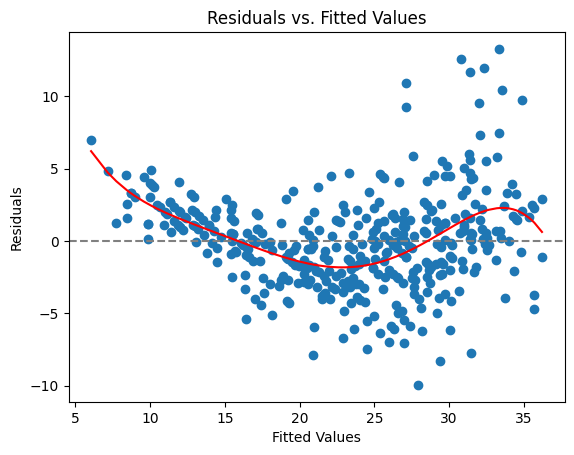

In [31]:
plot_residuals(best_model, features, labels, x_name='Fitted Values')

Testing interaction effects

In [32]:
cylinder_model = ols('mpg ~ cylinders', data=auto_data_clean).fit()
displacement_model = ols('mpg ~ displacement', data=auto_data_clean).fit()
horsepower_model = ols('mpg ~ horsepower', data=auto_data_clean).fit()
weight_model = ols('mpg ~ weight', data=auto_data_clean).fit()
acceleration_model = ols('mpg ~ acceleration', data=auto_data_clean).fit()

I'll start with two features that will certainly have an interaction effect (#cylinders is directly proportional to displacement)

In [33]:
cylinder_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     596.6
Date:                Fri, 24 May 2024   Prob (F-statistic):           1.31e-80
Time:                        13:05:16   Log-Likelihood:                -1179.3
No. Observations:                 392   AIC:                             2363.
Df Residuals:                     390   BIC:                             2371.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.9155      0.835     51.404      0.000      41.274      44.557
cylinders     -3.5581      0.146    -24.425      0.000      -3.844      -3.272
==============================================================================
Omnibus:                       38.938   Durbin-Watson:                   1.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.615
Skew:                           0.699   Prob(JB):                     1.38e-12
Kurtosis:                       4.179   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
displacement_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     718.7
Date:                Fri, 24 May 2024   Prob (F-statistic):           1.66e-90
Time:                        13:05:16   Log-Likelihood:                -1156.4
No. Observations:                 392   AIC:                             2317.
Df Residuals:                     390   BIC:                             2325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       35.1206      0.494     71.033      0.000      34.149      36.093
displacement    -0.0601      0.002    -26.808      0.000      -0.064      -0.056
==============================================================================
Omnibus:                       41.308   Durbin-Watson:                   0.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.139
Skew:                           0.709   Prob(JB):                     5.30e-14
Kurtosis:                       4.317   Cond. No.                         466.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we would expect, there is a positive effect on the model fit after incorporating the interaction term

In [35]:
interaction_model = ols('mpg ~ cylinders * displacement', data=auto_data_clean).fit()
interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     271.0
Date:                Fri, 24 May 2024   Prob (F-statistic):           8.35e-95
Time:                        13:05:16   Log-Likelihood:                -1139.7
No. Observations:                 392   AIC:                             2287.
Df Residuals:                     388   BIC:                             2303.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 48.2204      2.347     20.545      0.000      43.606      52.835
cylinders                 -2.4184      0.535     -4.524      0.000      -3.469      -1.367
displacement              -0.1344      0.016     -8.321      0.000      -0.166      -0.103
cylinders:displacement     0.0118      0.002      5.711      0.000       0.008       0.016
==============================================================================
Omnibus:                       42.283   Durbin-Watson:                   0.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.047
Skew:                           0.524   Prob(JB):                     3.45e-24
Kurtosis:                       5.349   Cond. No.                     1.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Show model fits graphically

In [36]:
def plot_model(model, data, x_name='Values'):
    mse = model.mse_resid
    r2 = model.rsquared
    preds = model.predict(data)
    plt.scatter(data, labels)
    plt.plot(data, preds, color='red')
    plt.xlabel(x_name)
    plt.ylabel('MPG')
    plt.legend([f'MSE: {mse:.2f}', f'R^2: {r2:.2f}'])
    plt.title(f'{x_name} vs. MPG')
    plt.show()

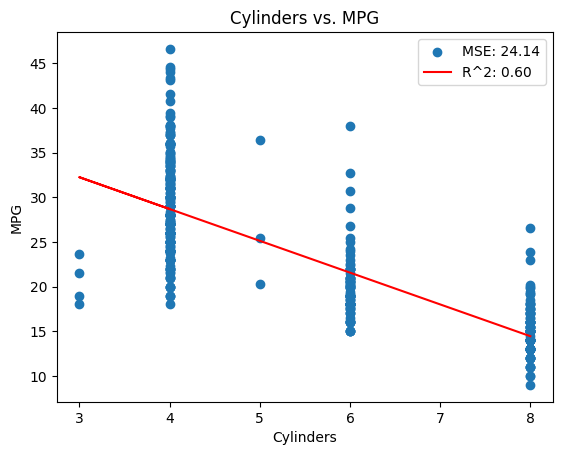

In [37]:
plot_model(cylinder_model, auto_data_clean['cylinders'], x_name='Cylinders')

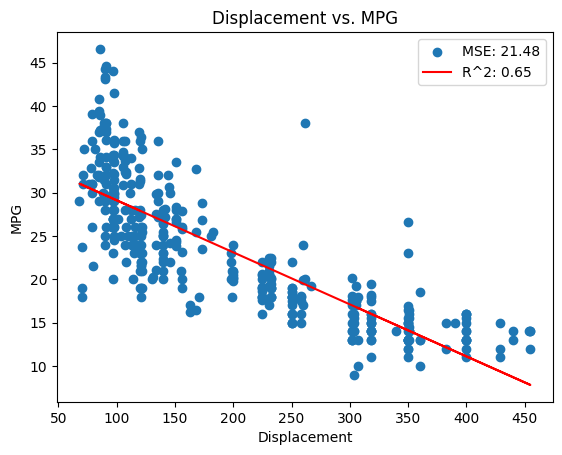

In [38]:
plot_model(displacement_model, auto_data_clean['displacement'], x_name='Displacement')

fitting the model on both variables, without an interaction term adds no value and cylinders appears statistically insignificant in this case

In [39]:
dual_model = ols('mpg ~ cylinders + displacement', data=auto_data_clean).fit()
dual_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     360.8
Date:                Fri, 24 May 2024   Prob (F-statistic):           2.41e-89
Time:                        13:05:16   Log-Likelihood:                -1155.6
No. Observations:                 392   AIC:                             2317.
Df Residuals:                     389   BIC:                             2329.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.5377      1.197     30.534      0.000      34.185      38.890
cylinders       -0.5763      0.443     -1.300      0.194      -1.448       0.295
displacement    -0.0511      0.007     -7.074      0.000      -0.065      -0.037
==============================================================================
Omnibus:                       41.461   Durbin-Watson:                   0.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.956
Skew:                           0.700   Prob(JB):                     2.13e-14
Kurtosis:                       4.377   Cond. No.                     1.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Very little evidence of non-linearity in cylinder model residuals

C:\Users\rgbmr\AppData\Local\Temp\ipykernel_13744\3168508626.py:12: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(preds, residuals, degree)
C:\Users\rgbmr\AppData\Local\Temp\ipykernel_13744\3168508626.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_preds = preds[sorted_indices]


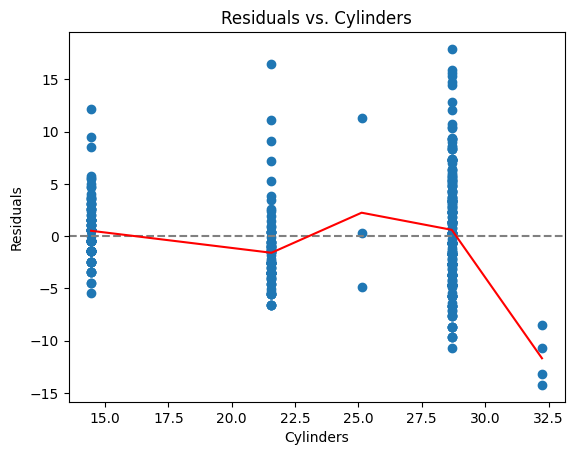

In [40]:
plot_residuals(cylinder_model, features, labels, x_name='Cylinders')

Already plotted above, but as a reminder this shows non-linearity

C:\Users\rgbmr\AppData\Local\Temp\ipykernel_13744\3168508626.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_preds = preds[sorted_indices]


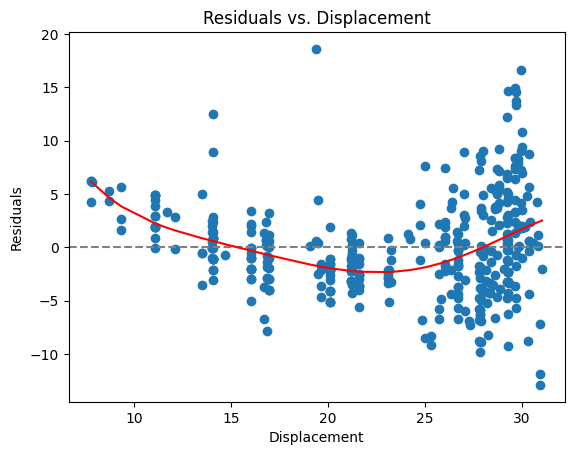

In [41]:
plot_residuals(displacement_model, features, labels, x_name='Displacement')

More support for improvement from interaciton term

In [42]:
import plotly.graph_objects as go

# Assuming interaction_model is already fitted
x1 = features['cylinders']
x2 = features['displacement']
y = labels

# Create a grid for x1 and x2
x1_range = np.linspace(x1.min(), x1.max(), 50)
x2_range = np.linspace(x2.min(), x2.max(), 50)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Predict y values for the grid
# Create a dataframe for the grid
grid_data = pd.DataFrame({
    'cylinders': x1_grid.ravel(),
    'displacement': x2_grid.ravel()
})

# Predict using the model
y_predict = interaction_model.predict(grid_data)

# Reshape the predicted values to match the grid
y_grid = y_predict.values.reshape(x1_grid.shape)

# Create the plot
fig = go.Figure()

# Add scatter plot
fig.add_trace(go.Scatter3d(
    x=x1, y=x2, z=y,
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Data'
))

# Add surface plot
fig.add_trace(go.Surface(
    x=x1_grid, y=x2_grid, z=y_grid,
    colorscale='reds',
    opacity=0.5,
    name='Regression Plane'
))

# Set labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='cylinders',
        yaxis_title='displacement',
        zaxis_title='mpg'
    ),
    title='3D Scatter Plot with Regression Plane'
)

fig.show()

C:\Users\rgbmr\AppData\Local\Temp\ipykernel_13744\3168508626.py:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



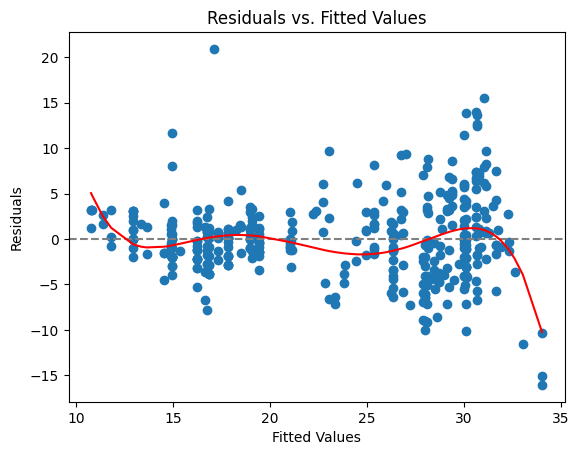

In [43]:
plot_residuals(interaction_model, features, labels, x_name='Fitted Values')